<a href="https://colab.research.google.com/github/t-whiteley/ML/blob/main/02PytorchClassificationMultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


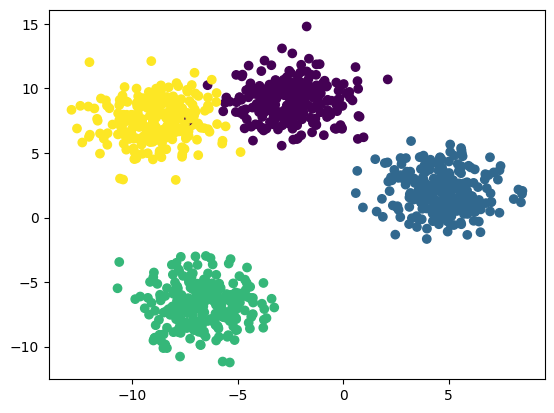

In [ ]:
# MAKING DATA

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples = 1000, n_features = NUM_FEATURES, centers = NUM_CLASSES, cluster_std = 1.5, random_state = RANDOM_SEED)

# make pytorch tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# partitioning data
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
from torch import nn

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_features),
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model = BlobModel(input_features=NUM_FEATURES, output_features=NUM_CLASSES).to(device)
model

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(RANDOM_SEED)

epochs = 100

X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model.train()
  y_logits = model(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  train_loss = loss_fn(y_logits, y_blob_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)

  if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.90962 | Test Loss: 0.68430
Epoch: 10 | Loss: 0.18843 | Test Loss: 0.16761
Epoch: 20 | Loss: 0.09588 | Test Loss: 0.08604
Epoch: 30 | Loss: 0.06759 | Test Loss: 0.05917
Epoch: 40 | Loss: 0.05463 | Test Loss: 0.04642
Epoch: 50 | Loss: 0.04735 | Test Loss: 0.03910
Epoch: 60 | Loss: 0.04275 | Test Loss: 0.03438
Epoch: 70 | Loss: 0.03960 | Test Loss: 0.03109
Epoch: 80 | Loss: 0.03732 | Test Loss: 0.02867
Epoch: 90 | Loss: 0.03561 | Test Loss: 0.02681


In [ ]:
model.eval()
with torch.inference_mode():
  y_logits = model(X_blob_test)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
  print(y_preds[:10], y_blob_test[:10])

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0') tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
